In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests
import csv
from contextlib import closing
from io import StringIO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Gather

In [2]:
#set up Token ID for twitter API access
consumer_key = 'tLAtorh1QREi8wdHNmNgwOi5P'
consumer_secret = 'i5w0hOxybIJCzq1cUtDImISyBuqU1HOkAsWby70WBp61STpb1C'
access_token = '938074359410946049-J3i1dZyd6cmlpwb7plVryydb0T92LyS'
access_secret = 'yEhi46rJ4luHuuqQaFGAZid3rrollkiXXuWA7QF3oxSnA'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True,parser=tweepy.parsers.JSONParser(), wait_on_rate_limit_notify = True)

dog_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = dog_archive['tweet_id'].tolist()
tweet_list = []
errors = {}
for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            favorite = tweet['favorite_count']
            retweet = tweet['retweet_count']
            tweet_list.append({'tweet_id': int(tweet_id), 
                                'favorites': int(favorite), 
                                'retweets': int(retweet)})
        except Exception as e:
            print(str(tweet_id) + "_" + str(e))
            errors[str(tweet_id) + "_" + str(e)] = tweet

888202515573088257_[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921_[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308_[{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977_[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832_[{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464_[{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968_[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 735
75401181696402

In [3]:
#writing the information downloaded from the twitter api to text files for storage
df_api_tweets = pd.DataFrame(data = tweet_list)
df_errors = pd.DataFrame(data = errors)
df_api_tweets.to_csv('dog_api.csv', index = False)
df_errors.to_csv('error_list.csv', index = False)

In [4]:
# programmatically download the udacity dog image dataset and store it within the project workspace
with requests.Session() as s:
    download = s.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    wrload = StringIO(download.text)
    df = pd.read_csv(wrload, sep = '\t')
    df.to_csv('dog_img.tsv', index=False)

In [2]:
#loads all neccessary data frames for the project
#after gathering all the data for the first time, this is used to save system and network resources
dog_archive = pd.read_csv('twitter-archive-enhanced.csv')
dog_archive.head()
dog_pred = pd.read_csv('dog_img.tsv')
dog_api = pd.read_csv('dog_api.csv')

# Assess

In [6]:
dog_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
dog_archive.dtypes


tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [9]:
print(dog_archive.in_reply_to_status_id.value_counts(dropna = False))
dog_archive[dog_archive.in_reply_to_status_id.notnull()]

NaN              2278
 6.671522e+17       2
 6.737159e+17       1
 6.753494e+17       1
 6.754971e+17       1
 6.827884e+17       1
 8.265984e+17       1
 6.780211e+17       1
 6.689207e+17       1
 6.658147e+17       1
 8.131273e+17       1
 7.291135e+17       1
 7.590995e+17       1
 7.384119e+17       1
 7.727430e+17       1
 7.468859e+17       1
 8.634256e+17       1
 6.693544e+17       1
 6.914169e+17       1
 8.862664e+17       1
 6.747400e+17       1
 8.319030e+17       1
 7.971238e+17       1
 7.331095e+17       1
 7.501805e+17       1
 6.744689e+17       1
 7.638652e+17       1
 6.747934e+17       1
 8.503288e+17       1
 6.747522e+17       1
                 ... 
 8.380855e+17       1
 8.558616e+17       1
 6.964887e+17       1
 8.558585e+17       1
 7.032559e+17       1
 6.678065e+17       1
 8.018543e+17       1
 7.667118e+17       1
 6.855479e+17       1
 6.717299e+17       1
 6.935722e+17       1
 6.758457e+17       1
 7.476487e+17       1
 6.849598e+17       1
 6.924173e

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [10]:
dog_pred.head()
#dog_pred.img_num.value_counts()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
dog_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [12]:
dog_api.sample(7)

,favorites,retweets,tweet_id
490,12859,3500,813127251579564032
818,4537,988,768855141948723200
1448,2878,997,694925794720792577
1303,2741,1189,706644897839910912
2231,1949,1137,667886921285246976
832,4351,874,766693177336135680
580,10794,3109,799297110730567681


In [13]:
dog_api.dtypes

favorites    int64
retweets     int64
tweet_id     int64
dtype: object

### Tidiness Issues
- dog predictions table, retweets and favorites should be in the main table
- Doggo, Pupper, Puppo, Floofer should be combined into one column

### Quality Issues
- some entries are replies to other tweets, not relevant
- not all entries in dog_archive have pictures
- some entries are retweets
- some images dont have dogs
- time stamp should be a date object
- doggo, puppo, pupper, and floofer should be categorical
- all dog types need to be capitalized
- Null values in doggo, puppo, pupper, floofer stored as objects

# Clean

In [75]:
#make copies of the dataframes to clean
dog_archive_clean = dog_archive.copy()
dog_pred_clean = dog_pred.copy()
dog_api_clean = dog_api.copy()

#### Define
Pupper, Puppo, Floofer, and Doggo tables should be combines into 1 column.  Adding together 4 columns into age column

#### Code

In [76]:
#we combine Pupper, Puppo, and Doggo columns into one column via indexing and stacking
dog_archive_clean["age"] = dog_archive_clean.T.iloc[13:17].replace({"None":""}).sum().replace({"":"None"})
dog_archive_clean.drop(['pupper', 'puppo', 'doggo', 'floofer'],axis = 1, inplace=True)

#### Test

In [77]:
dog_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,age
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


#### Define
Dog prediction table should be part of the dog archive table.  Performing a join betweet the 2 tables on tweet id will combine them.  By performing an inner join, we filter out tweet ids that don't have images.

#### Code

In [78]:
#we perform a right join btween dog_archive clean and dog_pred_clean to combine the dataframes
#in this process, we also filter out tweets without an image, 
clean_dog = []
clean_dog = pd.merge(dog_archive_clean, dog_pred_clean, how = 'inner', on = 'tweet_id')

#### Test

In [79]:
clean_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
age                           2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 n

#### Define
The Dog archive is missing retweets and favorites.  Performing a join will append the retweets and favorites to the dog archive table.

#### Code

In [80]:
#next, we preform a left join with the dog_archive_clean and the twitter_api_clean dataframes to append retweets and favorites
clean_dog = pd.merge(clean_dog, dog_api_clean, how ='left', on = 'tweet_id')

#### Test

In [81]:
clean_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 27 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
age                           2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 n

#### Define
There's multiple replies to tweets that are of no interest.  Dropping all non-null values in the in reply to status id column will resolve this.

#### Code

In [82]:
#it looks like 78 rows within the dog_archive are replies to tweets.
#To fix this issue, we will filter out all tweets with a non-null value for in_reply_to_status_id
clean_dog = clean_dog[clean_dog.in_reply_to_status_id.isnull()]

#### Test

In [83]:
clean_dog.in_reply_to_status_id.value_counts(dropna = False)

NaN    2052
Name: in_reply_to_status_id, dtype: int64

#### Define
There's also 81 retweets that are of no interest.  Dropping all non-null values in the retweeted status id column will resolve this

#### Code

In [84]:
#To fix this issue, we will filter out all tweets with a non-null value for retweeted_status_id
clean_dog = clean_dog[clean_dog.retweeted_status_id.isnull()]

#### Test

In [85]:
clean_dog.retweeted_status_id.value_counts(dropna = False)

NaN    1971
Name: retweeted_status_id, dtype: int64

#### Define
Some images dont have any dogs in them.  Filtering out any entries that dont have a True value in either p1 dog, p2 dog, or p3 dog columns.

#### Code

In [86]:
#Next, we remove images that dont have any predictions as dogs.  This is done by utilizing p1_dog, p2_dog, and p3_dog
clean_dog = clean_dog[(clean_dog.p1_dog == True) | (clean_dog.p2_dog == True) | (clean_dog.p3_dog == True)]

#### Test

In [87]:
clean_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2074
Data columns (total 27 columns):
tweet_id                      1666 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1666 non-null object
source                        1666 non-null object
text                          1666 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1666 non-null object
rating_numerator              1666 non-null int64
rating_denominator            1666 non-null int64
name                          1666 non-null object
age                           1666 non-null object
jpg_url                       1666 non-null object
img_num                       1666 non-null int64
p1                            1666 non-null object
p1_conf                       1666 non-nu

#### Define
Timestamp should be a datetime object.  Casting via to_datetime method

#### Code

In [88]:
#next we convert timestamp to a datetime object
clean_dog['timestamp'] = pd.to_datetime(clean_dog['timestamp'])

#### Test

In [89]:
clean_dog.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
age                                   object
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3        

#### Define
Not all Dog predictions are capitalized.  Fixing via str.capitalize method

#### Code

In [90]:
#Now, we capitalize the prediction columns, p1, p2, and p3
clean_dog['p1'] = clean_dog.p1.str.capitalize()
clean_dog['p2'] = clean_dog.p2.str.capitalize()
clean_dog['p3'] = clean_dog.p3.str.capitalize()

#### Test

In [91]:
clean_dog['p3']

1                          Papillon
2                            Kelpie
3                           Spatula
4       German_short-haired_pointer
5                   Indian_elephant
6                         Ice_lolly
7                          Pembroke
8          Chesapeake_bay_retriever
9                         Chihuahua
10                             Chow
11                           Muzzle
12                          Basenji
13        Staffordshire_bullterrier
14                          Redbone
15                           Saluki
16               Labrador_retriever
17                   English_setter
18                         Malamute
20                     Bull_mastiff
21                       Weimaraner
23                           Beagle
24                       Weimaraner
25        Staffordshire_bullterrier
26                       Can_opener
27                   Dandie_dinmont
29                      Boston_bull
30                      Siamese_cat
31             Bernese_mount

#### Define
'None' values in doggo, puppo, pupper, floofer columns.  Replacing with NaN via df.replace

#### Code

In [92]:
#We convert the 'None' values to NaN
clean_dog['age'] = clean_dog['age'].replace('None', np.nan)

#### Test

In [93]:
clean_dog.age.value_counts()

pupper          166
doggo            54
puppo            21
doggopupper       7
floofer           7
doggofloofer      1
doggopuppo        1
Name: age, dtype: int64

#### Define
The age column should be categorical.  Casting it via astype method

#### Code

In [94]:
#Finally, we convert the 4 dog age columns to categorical variables
clean_dog['age'] = clean_dog['age'].astype('category')

#### Test

In [95]:
clean_dog.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
age                                 category
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3        

In [96]:
#Writing our cleaner dataset to a master csv
clean_dog.to_csv('twitter_archive_master.csv', index=False)

In [97]:
# Checking the average rating and average number of retweets for the Doggo category
print(clean_dog.rating_numerator[(clean_dog.age == 'doggo')].mean())
print(clean_dog.retweets[(clean_dog.age == 'doggo')].mean())

11.9259259259
6996.98148148


In [98]:
#Checking the average rating and average number of retweets for the Puppo category
print(clean_dog.rating_numerator[(clean_dog.age == 'puppo')].mean())
print(clean_dog.retweets[(clean_dog.age == 'puppo')].mean())

11.9523809524
6338.71428571


In [99]:
#Checking the average rating and average number of retweets for the Puppo category
print(clean_dog.rating_numerator[(clean_dog.age == 'pupper')].mean())
print(clean_dog.retweets[(clean_dog.age == 'pupper')].mean())

10.9638554217
2374.81325301


In [102]:
#Checking the average rating and average number of retweets for Doggos who are also in the Floofer category
print(clean_dog.rating_numerator[(clean_dog.age == 'doggofloofer')].mean())
print(clean_dog.retweets[(clean_dog.age == 'doggofloofer')].mean())

11.0
3336.0


<function matplotlib.pyplot.show>

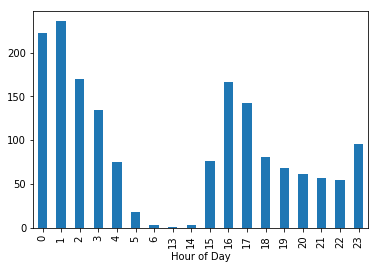

In [101]:
#looking at what time of day We_Rate_Dogs posts dog ratings
clean_dog['timestamp'].groupby(clean_dog['timestamp'].dt.hour).count().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.show